# Project Description

Given information about the employees, build a machine learning model to predict when employees are going to quit by understanding the main drivers of employee churn.


In [30]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from datetime import timedelta
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn import tree

In [3]:
data=pd.read_csv('employee_data.csv')
data

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaN
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22
...,...,...,...,...,...,...,...
24697,549847.0,3,customer_service,16,97000.0,2015-02-18,NaN
24698,590087.0,4,engineer,10,160000.0,2015-10-26,NaN
24699,777612.0,4,customer_service,11,67000.0,2013-09-03,2015-10-23
24700,97289.0,10,engineer,98,266000.0,2011-12-13,2015-01-09


In [4]:
data.describe()

,employee_id,company_id,seniority,salary
count,24702.000000,24702.000000,24702.000000,24702.000000
mean,501604.403530,3.426969,14.127803,138183.345478
std,288909.026101,2.700011,8.089520,76058.184573
min,36.000000,1.000000,1.000000,17000.000000
25%,250133.750000,1.000000,7.000000,79000.000000
50%,500793.000000,2.000000,14.000000,123000.000000
75%,753137.250000,5.000000,21.000000,187000.000000
max,999969.000000,12.000000,99.000000,408000.000000


In [5]:
data.isnull().sum()

employee_id        0
company_id         0
dept               0
seniority          0
salary             0
join_date          0
quit_date      11192
dtype: int64

# Dataset 
The dataset contains information about employees who joined the company from 2011/01/24 to 2015/12/13. 

- employee_id : id of the employee. Unique by employee per company

- company_id : company id. It is unique by company

- dept : employee dept

- seniority : number of yrs of work experience when hired

- salary: avg yearly salary of the employee during her tenure within the company

- join_date: when the employee joined the company, it can only be between 2011/01/24 and 2015/12/13

- quit_date: when the employee left her job (if she is still employed as of 2015/12/13, this field is NA)



In [6]:
#make join_date and quit_date as date
data['join_date'] = pd.to_datetime(data['join_date']) 
data['quit_date'] = pd.to_datetime(data['quit_date']) 
  

In [11]:
data.describe(include="all")

<ipython-input-11-959e96f52f7b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe(include="all")
<ipython-input-11-959e96f52f7b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe(include="all")


,employee_id,company_id,dept,seniority,salary,join_date,quit_date
count,24702.000000,24702.000000,24702,24702.000000,24702.000000,24702,13510
unique,NaN,NaN,6,NaN,NaN,995,664
top,NaN,NaN,customer_service,NaN,NaN,2012-01-03 00:00:00,2015-05-08 00:00:00
freq,NaN,NaN,9180,NaN,NaN,105,111
first,NaN,NaN,NaN,NaN,NaN,2011-01-24 00:00:00,2011-10-13 00:00:00
last,NaN,NaN,NaN,NaN,NaN,2015-12-10 00:00:00,2015-12-09 00:00:00
mean,501604.403530,3.426969,NaN,14.127803,138183.345478,NaN,NaN
std,288909.026101,2.700011,NaN,8.089520,76058.184573,NaN,NaN
min,36.000000,1.000000,NaN,1.000000,17000.000000,NaN,NaN
25%,250133.750000,1.000000,NaN,7.000000,79000.000000,NaN,NaN


In [15]:
'''
for each company, find the headcount for each date between '2011/01/24' and '2015/12/13'
'''
#create list of all dates within the range
unique_dates = pd.date_range(start='2011/01/24', end='2015/12/13')
  
#create list of unique companies
unique_companies = data['company_id'].unique()
  
#cross join to get all combinations of dates and companies.
data_headcount = pd.MultiIndex.from_product([unique_dates, unique_companies], names = ["date", "company_id"])
data_headcount = pd.DataFrame(index = data_headcount).reset_index()
  


In [16]:
data_headcount

,date,company_id
0,2011-01-24,7
1,2011-01-24,4
2,2011-01-24,2
3,2011-01-24,9
4,2011-01-24,1
...,...,...
21415,2015-12-13,5
21416,2015-12-13,3
21417,2015-12-13,8
21418,2015-12-13,11


In [21]:
#each day/company, how many people quit/got hired on that day
data_join = data.groupby(['join_date', 'company_id']).size().reset_index(name='join_count')
data_join.columns.values[0]='date'
data_quit = data.groupby(['quit_date', 'company_id']).size().reset_index(name='quit_count')
data_quit.columns.values[0]='date'
  

#NA means no people were hired/quit on that day cause there is no match.
data_headcount = pd.merge(data_headcount, data_join, on=["date", "company_id"], how='left')
data_headcount = pd.merge(data_headcount, data_quit, on=["date", "company_id"], how='left')
  
#replace the NAs with 0
data_headcount.fillna(0, inplace=True)
  
#sum by company_id. Data set is already ordered by date, so I can simply group by company_id and do cumsum
data_headcount['cumsum_join'] = data_headcount.groupby(['company_id'])['join_count'].apply(lambda x: x.cumsum())
data_headcount['cumsum_quit'] = data_headcount.groupby(['company_id'])['quit_count'].apply(lambda x: x.cumsum())
  

data_headcount['count'] = data_headcount['cumsum_join'] - data_headcount['cumsum_quit']
data_headcount_table = data_headcount[["date", "company_id","count"]]
  
# check company 1
print(data_headcount_table.query("company_id == 1").head(15))

          date  company_id  count
4   2011-01-24           1   25.0
16  2011-01-25           1   27.0
28  2011-01-26           1   29.0
40  2011-01-27           1   29.0
52  2011-01-28           1   29.0
64  2011-01-29           1   29.0
76  2011-01-30           1   29.0
88  2011-01-31           1   59.0
100 2011-02-01           1   66.0
112 2011-02-02           1   67.0
124 2011-02-03           1   67.0
136 2011-02-04           1   67.0
148 2011-02-05           1   67.0
160 2011-02-06           1   67.0
172 2011-02-07           1   99.0


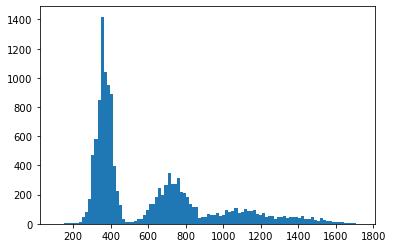

In [22]:

  
#How many days were they employed? This should matter. People might get bored in the same place for too long
data['employment_length'] = (data['quit_date'] - data['join_date']).astype('timedelta64[D]')
  
#plot employment length in days
#there are peaks around each employee year anniversary
plt.hist(data['employment_length'].dropna(), bins=100)
plt.show()

Here, we need to find the characteristics of people who quit early. Looking at the histogram of employment_length, it looks like we could define early quitters as those people who quit within 1 yr or so. So, let’s create two classes of users : quit within 13 months or not (if they haven’t been in the current company for at least 13 months, we remove them)

In [24]:

#Create binary class
data=data[data['join_date'] <datetime.strptime("2015/12/13", "%Y/%m/%d") - timedelta(days=(365+31))]
data['early_quitter'] = np.where((data['employment_length']>396) | (np.isnan(data['employment_length'])), 0, 1)

<ipython-input-24-c283e87b046a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['early_quitter'] = np.where((data['employment_length']>396) | (np.isnan(data['employment_length'])), 0, 1)


In [26]:
data

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,employment_length,early_quitter
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,585.0,0
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,340.0,1
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaT,NaN,0
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,389.0,1
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,1040.0,0
...,...,...,...,...,...,...,...,...,...
24695,63273.0,1,data_science,5,172000.0,2012-05-01,2015-06-26,1151.0,0
24696,94644.0,6,marketing,7,88000.0,2012-01-26,2013-02-01,372.0,1
24699,777612.0,4,customer_service,11,67000.0,2013-09-03,2015-10-23,780.0,0
24700,97289.0,10,engineer,98,266000.0,2011-12-13,2015-01-09,1123.0,0


In [27]:
data_dummy = pd.get_dummies(data[['company_id', 'dept', 'seniority', 'salary', 'early_quitter']], drop_first=True)           
  

In [28]:
data_dummy

,company_id,seniority,salary,early_quitter,dept_data_science,dept_design,dept_engineer,dept_marketing,dept_sales
0,7,28,89000.0,0,0,0,0,0,0
1,7,20,183000.0,1,0,0,0,1,0
2,4,14,101000.0,0,0,0,0,1,0
3,7,20,115000.0,1,0,0,0,0,0
4,2,23,276000.0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
24695,1,5,172000.0,0,1,0,0,0,0
24696,6,7,88000.0,1,0,0,0,1,0
24699,4,11,67000.0,0,0,0,0,0,0
24700,10,98,266000.0,0,0,0,1,0,0


In [31]:
dt = DecisionTreeClassifier( max_depth=4, min_samples_leaf = 30, class_weight="balanced", min_impurity_decrease = 0.001)
dt.fit(data_dummy.drop('early_quitter', axis=1), data['early_quitter'])
  


DecisionTreeClassifier(class_weight='balanced', max_depth=4,
                       min_impurity_decrease=0.001, min_samples_leaf=30)

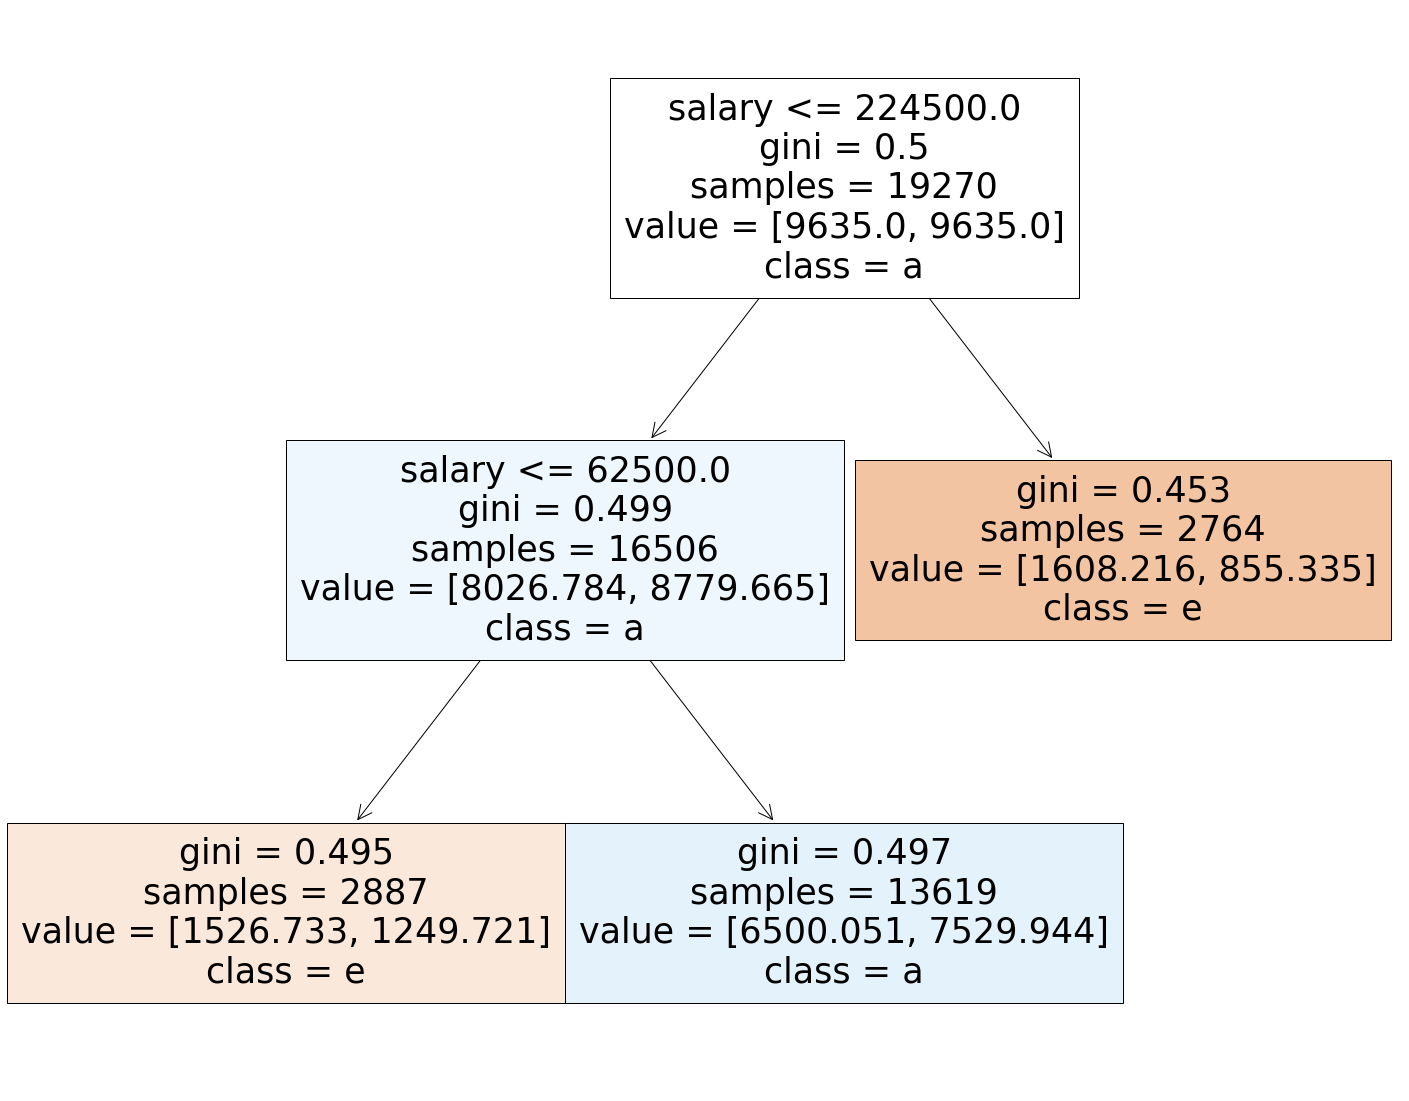

In [32]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt, 
                   feature_names=data_dummy.drop('early_quitter', axis=1).columns ,  
                   class_names='early_quitter',
                   filled=True)


- Salary is what matters the most. After all, it probably has within it information about the other variables too. That is, seniority, dept and company impact salary. So salary carries pretty much all the information available.

- Looking at the terminal nodes, If salary between 224500 and 62500, the employee has higher probability of being an early quitter. That is, that’s a leaf that predicts class 1. Otherwise, the other two nodes predict class 0, which are >224500 and <62500. That means that people who make a lot of money and very little are not likely to quit.



<ipython-input-34-28b4b4b7ad9e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['salary_percentile'] = pd.qcut(data['salary'],q=50, labels=False)


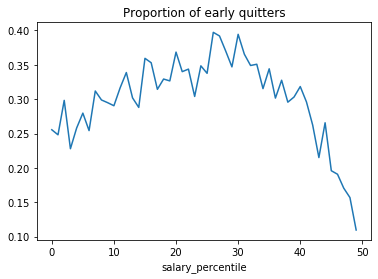

In [34]:
#convert salary to its percentiles. break it into 50 bins.
data['salary_percentile'] = pd.qcut(data['salary'],q=50, labels=False)
#take proportion of early quitters for each percentile value and plot it
data.groupby('salary_percentile')['early_quitter'].mean().plot(title="Proportion of early quitters")
plt.show()

- Employees tend to quit at year anniversaries. Even if you don’t like your current job, you often stay for 1 yr before quitting + you often get stocks after 1 yr so it makes sense to wait.


- Employees with low and high salaries are less likely to quit. Probably because employees with high salaries are happy there and employees with low salaries are not that marketable, so they have a harder time finding a new job. Obviously, those are totally different situations.


- When building machine learning models on real data, you will find surprisingly often that one variable is way more important than the rest. We saw it in the conversion project too with number of pages visited. It is unlikely though that in real life one thing can explain complex phenomena. The most likely reason is that one variable is highly correlated with a lot of other variables. Like here, salary is obviously important, but especially because it is a proxy for so many other things (seniority, how marketable is someone, how much that person feels appreciated at work, etc). In these cases, assuming you have access to many other variables, try to get to the bottom of these relationships, by for instance building a model that predicts salary or removing salary and see which variables start to matter. After all, our model says that low salaries are less likely to quit. But definitely, it is not that if you reduce all salaries below 60K, retention will go up…


- Given how important is salary, I would definitely love to have as a variable the salary the employee who quit was offered in the next job. Otherwise, things like: promotions or raises received during the employee tenure would be interesting. Understanding the trajectory of someone via their salaries at different time points could be really useful.


